## Assignment-3

## NAME : SABIHA <BR>
## ID : 8896658


In [339]:
# IMPORT libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Part - A

 Loading  iris data

In [340]:
iris = load_iris(as_frame=True,return_X_y=False)

In [341]:
X = iris.data
y = iris.target

In [342]:
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [343]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


In [344]:
X.shape

(150, 4)

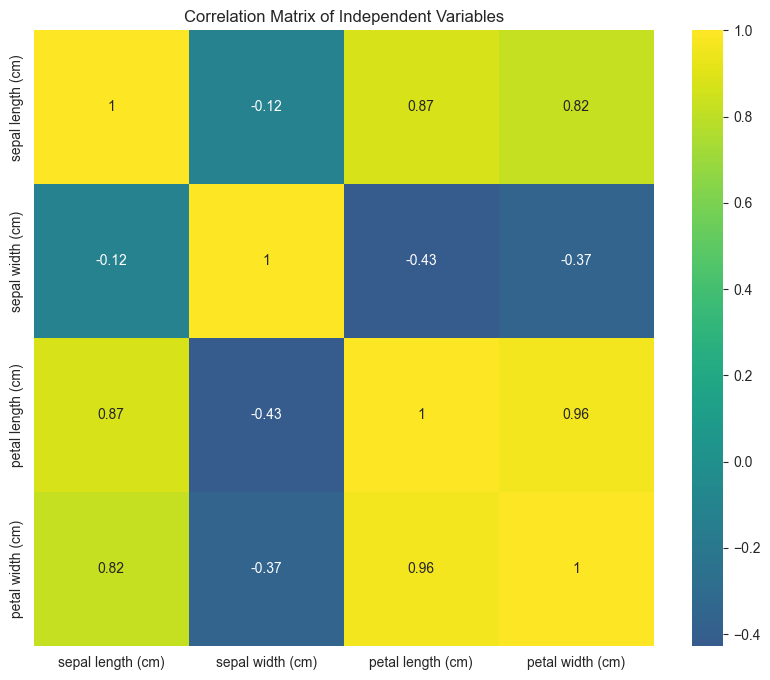

In [345]:

# Create a DataFrame using the independent variables
df = pd.DataFrame(X, columns=iris.feature_names)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Correlation Matrix of Independent Variables')
plt.show()


Drop the 'sepal length (cm)' and 'sepal width (cm)' columns

In [346]:
# Drop the 'sepal length (cm)' and 'sepal width (cm)' columns
df = df.drop(columns=['sepal length (cm)', 'sepal width (cm)'])
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Figure out if any preprocessing such as scaling would help here

In [347]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
df = scaler.fit_transform(df)

In [348]:
df = pd.DataFrame(df)

df.columns = ['petal_length_(cm)', 'petal_width_(cm)']


In [349]:
df.head(10)

,petal_length_(cm),petal_width_(cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
5,0.118644,0.125000
6,0.067797,0.083333
7,0.084746,0.041667
8,0.067797,0.041667
9,0.084746,0.000000


In [350]:
# Initialize a list to store within-cluster sum of squares (WCSS) values
from sklearn.cluster import KMeans

wcss = []

# Try different values of k to find the optimal number of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=25, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)



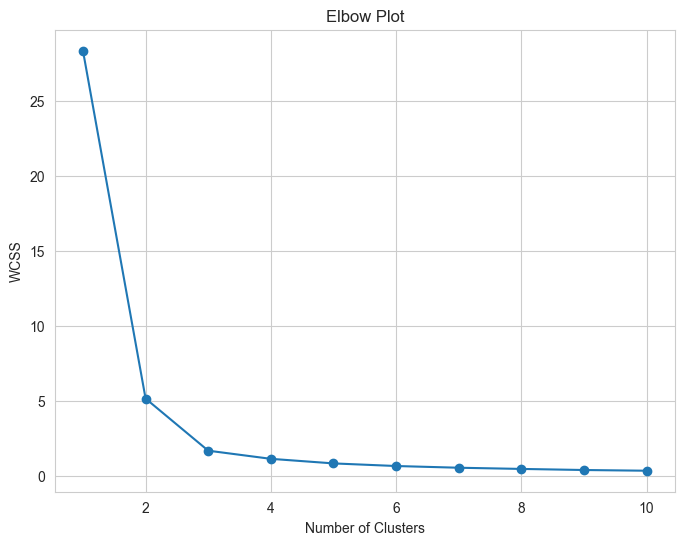

In [351]:
# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The elbow plot indicates that the optimal number of clusters is 3 (k=3). Beyond this point, there is no substantial reduction in the within-cluster sum of squares (WCSS) value. Therefore, it can be concluded that the most suitable choice for the number of clusters, denoted as k, is 3.

In [352]:
from sklearn.cluster import KMeans

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=16 ,init='k-means++', max_iter=300, n_init=10)

# Fit KMeans model to the scaled data
kmeans.fit(df)




KMeans(n_clusters=3, n_init=10, random_state=16)

In [353]:
y_km = kmeans.fit_predict(df)
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

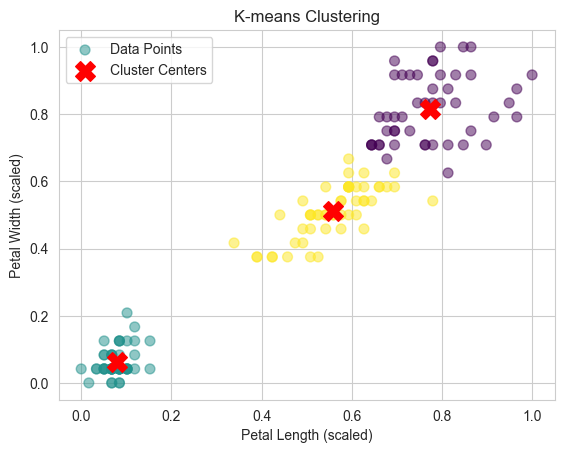

Cluster Centers:
[[0.7740113  0.81510417]
 [0.07830508 0.06083333]
 [0.55867014 0.51041667]]


In [354]:
# Get the cluster labels
cluster_labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_


# Plot the data points
plt.scatter(df['petal_length_(cm)'], df['petal_width_(cm)'], c=cluster_labels, cmap='viridis', s=50, alpha=0.5, label='Data Points')

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.title('K-means Clustering')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.legend()
plt.show()


# Print the cluster centers
print("Cluster Centers:")
print(cluster_centers)




# PART-2
 # 1. Importing the heart disease dataset

In [355]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [356]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## 2.Checking for null values

In [358]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## 3.Scaling the data using Z-score Standardization

In [359]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for column in data.columns:
    if((((data[column].dtype) == 'int64') | ((data[column].dtype) == 'float64')) & (column != 'HeartDisease')):
        data[column] = scaler.fit_transform(data[column].values.reshape(-1,1))
    else:
        continue

data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,-0.551341,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,-0.551341,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,-0.551341,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,-0.551341,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,-0.551341,Normal,-0.581981,N,-0.832432,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,M,TA,-1.210356,0.596393,-0.551341,Normal,-0.188999,N,0.293283,Flat,1
914,1.536902,M,ASY,0.627078,-0.053049,1.813758,Normal,0.164684,N,2.357094,Flat,1
915,0.370100,M,ASY,-0.129513,-0.620168,-0.551341,Normal,-0.857069,Y,0.293283,Flat,1
916,0.370100,F,ATA,-0.129513,0.340275,-0.551341,LVH,1.461525,N,-0.832432,Flat,1


 ## 4.Remove outliers using Z-score

In [360]:
# Remove outliers using Z-score
import numpy as np
from scipy import stats
# Calculate Z-scores for numeric columns
z_scores = np.abs(stats.zscore(data.select_dtypes(include=['int64', 'float64'])))

# Create a boolean filter to identify rows with Z-scores within the threshold
filter_con = (z_scores < 3).all(axis=1)

# Remove outliers
new_df = data[filter_con]




In [361]:
# Print the shape of the dataset before and after removing outliers
print("Original dataset shape:", data.shape)
print("Dataset shape after removing outliers:", new_df.shape)

Original dataset shape: (918, 12)
Dataset shape after removing outliers: (899, 12)


The original dataset consisted of 918 samples with 12 features each. After removing outliers using the Z-score method, the dataset size has been reduced to 899 samples, while still retaining the same 12 features. 

In [362]:
new_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,-0.001450,-0.019926,-0.007263,-0.001502,0.004257,-0.024251,0.547275
std,1.003033,0.925250,0.980180,0.999607,0.996474,0.945250,0.498037
min,-2.706015,-2.831621,-1.818435,-0.551341,-2.900575,-2.708624,0.000000
25%,-0.690629,-0.669935,-0.222270,-0.551341,-0.660578,-0.832432,0.000000
50%,0.051881,-0.129513,0.212216,-0.551341,0.046790,-0.363384,1.000000
75%,0.688318,0.410909,0.614688,-0.551341,0.754157,0.574711,1.000000
max,2.491558,2.842807,2.919751,1.813758,2.561874,2.919951,1.000000


In [363]:
# Import the necessary libraries
import pandas as pd

# List of columns to one-hot encode
encoded_new_df  = pd.get_dummies(new_df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# Display the encoded DataFrame
print(encoded_new_df)


          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak   
0   -1.433140   0.410909     0.825070  -0.551341  1.382928 -0.832432  \
1   -0.478484   1.491752    -0.171961  -0.551341  0.754157  0.105664   
2   -1.751359  -0.129513     0.770188  -0.551341 -1.525138 -0.832432   
3   -0.584556   0.302825     0.139040  -0.551341 -1.132156  0.574711   
4    0.051881   0.951331    -0.034755  -0.551341 -0.581981 -0.832432   
..        ...        ...          ...        ...       ...       ...   
913 -0.902775  -1.210356     0.596393  -0.551341 -0.188999  0.293283   
914  1.536902   0.627078    -0.053049   1.813758  0.164684  2.357094   
915  0.370100  -0.129513    -0.620168  -0.551341 -0.857069  0.293283   
916  0.370100  -0.129513     0.340275  -0.551341  1.461525 -0.832432   
917 -1.645286   0.302825    -0.217696  -0.551341  1.422226 -0.832432   

     HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP   
0               0  False   True              False  ...  

In [364]:
# Convert the One-hot-encoded boolean columns to integers 1 or 0
encoded_new_df.iloc[:, 6:] = encoded_new_df.iloc[:, 6:].astype(int)

encoded_new_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [365]:
new_df['HeartDisease'].value_counts()

HeartDisease
1    492
0    407
Name: count, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

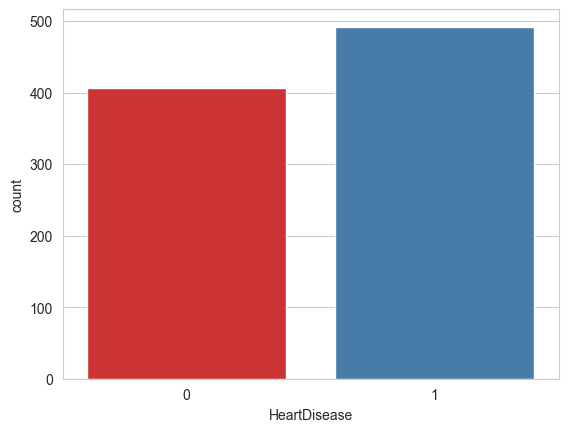

In [366]:
sns.set_style("whitegrid")
sns.countplot(x = "HeartDisease",data = new_df,palette='Set1')

## 5. Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy

In [367]:
X = encoded_new_df.drop(columns=['HeartDisease'])
y = encoded_new_df[[ 'HeartDisease']]

In [368]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,0,0,1,0,0,1,0,0,1,0,0,1,0


 Data Preprocessing Using Standard Scaler

In [369]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

 Splitting the data

In [370]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

## SVM Classification model

In [371]:
from sklearn.svm import SVC
from sklearn import svm
# Fitting the Standalone SVM model with training data

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

# Making predictions

In [372]:
y_pred = svm_model.predict(X_test)

In [373]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1], dtype=int64)

# perform metrics

In [374]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("The accuracy score of the SVM  classifier is:", accuracy_score(y_test, y_pred))

print("The confusion matrix of the SVM  classifier is:", confusion_matrix(y_test, y_pred), sep = '\n')

print("The recall score of the SVM  classifier is:", recall_score(y_test, y_pred))

print("The precision score of the SVM  classifier is:", precision_score(y_test, y_pred))

print("The f1 score of the SVM  classifier is:", f1_score(y_test, y_pred))

The accuracy score of the SVM  classifier is: 0.8888888888888888
The confusion matrix of the SVM  classifier is:
[[68 18]
 [ 2 92]]
The recall score of the SVM  classifier is: 0.9787234042553191
The precision score of the SVM  classifier is: 0.8363636363636363
The f1 score of the SVM  classifier is: 0.9019607843137255


Confusion Matrix:


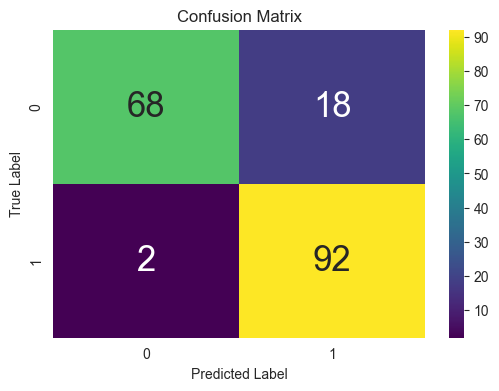

In [375]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_rf = confusion_matrix(y_test, y_pred)
annot_kws = {"size": 25}
plt.figure(figsize=(6, 4))
sns.heatmap(cf_rf, annot=True ,cmap = "viridis" ,fmt='g',annot_kws=annot_kws)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Performing Cross validation on SVM  Classification model

In [376]:
# Performing Cross validation on SVM standalone Classification model

from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())



Cross-validation accuracy scores: [0.83333333 0.84722222 0.90972222 0.84722222 0.85314685]
Mean accuracy: 0.8581293706293707


In [377]:
from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') # The average ='weighted' will consider the class imbalance.

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())



Cross-validation precision scores: [0.83320313 0.84689153 0.90967882 0.84861111 0.85459925]
Mean precision: 0.8585967673708058


In [378]:
# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') # average='macro': The recall score is calculated for each class individually, and then the average of these scores is computed. It gives equal weight to each class, regardless of class imbalance.

recall_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation Recall Scores: [0.8037001  0.921875   0.834375   0.8296875  0.86006725]
Mean Recall Score: 0.8499409688412853


Comparing the performance metrics of the SVM classifier with and without cross-validation:

**Without Cross-Validation:**
- **Accuracy Score:** The SVM classifier achieved an accuracy of approximately 88.89% on the test data. This indicates the proportion of correctly classified instances out of the total.
- **Confusion Matrix:** The confusion matrix shows that the classifier made 68 correct predictions for the first class (True Negatives) and 92 correct predictions for the second class (True Positives). It also made 18 false predictions for the first class (False Positives) and 2 false predictions for the second class (False Negatives).
- **Recall Score:** The recall score, also known as sensitivity or true positive rate, is around 97.87%. This suggests that the classifier is effective at identifying the second class (positive cases) correctly.
- **Precision Score:** The precision score, a measure of how many of the predicted positive instances are actually positive, is approximately 83.64%. This indicates that the classifier is relatively selective when predicting the positive class.
- **F1 Score:** The F1 score, which balances precision and recall, is about 90.20%. It provides a balanced measure of the classifier's performance.

**With Cross-Validation:**
- Cross-validation was applied to assess the model's performance across multiple subsets of the data. The mean accuracy across the folds is approximately 85.81%.
- The mean precision score across the folds is about 85.86%. This indicates the average proportion of correctly predicted positive instances out of the total predicted positives.
- The mean recall score across the folds is around 84.99%. It reflects the average ability of the classifier to identify positive instances correctly.

In summary, both without and with cross-validation approaches show that the SVM classifier performs well in terms of accuracy, precision, recall, and F1 score. The cross-validation results provide additional insight into the stability and generalization capability of the model across different data subsets.

## Logistic  regression Model

In [379]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [380]:
y_pred_logistic = logistic.predict(X_test)

In [381]:
# Find the Logistic Regression classifier model performance metrics without cross-validation

print("The accuracy score of the Logistic Regression :", accuracy_score(y_test, y_pred_logistic))
print("The precision score of the Logistic Regression :", precision_score(y_test, y_pred_logistic))
print("The recall score of the Logistic Regression :", recall_score(y_test, y_pred_logistic))
print("The f1 score of the Logistic Regression :", f1_score(y_test, y_pred_logistic))
print("The confusion matrix of the Logistic Regression :", confusion_matrix(y_test, y_pred_logistic), sep = '\n')

The accuracy score of the Logistic Regression : 0.8833333333333333
The precision score of the Logistic Regression : 0.8411214953271028
The recall score of the Logistic Regression : 0.9574468085106383
The f1 score of the Logistic Regression : 0.8955223880597015
The confusion matrix of the Logistic Regression :
[[69 17]
 [ 4 90]]


Confusion Matrix:


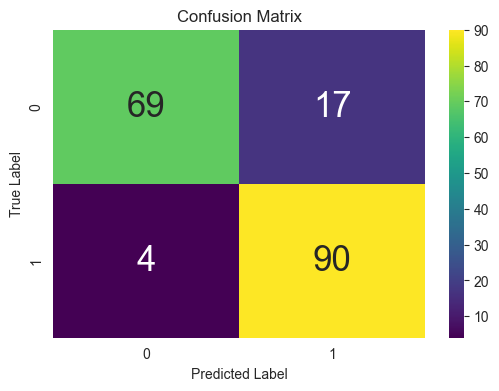

In [382]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_rf = confusion_matrix(y_test, y_pred_logistic)
annot_kws = {"size": 25}
plt.figure(figsize=(6, 4))
sns.heatmap(cf_rf, annot=True ,cmap = "viridis" ,fmt='g',annot_kws=annot_kws)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Performing cross Validation on the logistic regression model

In [383]:
# Performing Cross validation on Logistic Regression Classification model
from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score on cross validation
cross_val_scores = cross_val_score(logistic, X_train, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())



Cross-validation accuracy scores: [0.86111111 0.84722222 0.83333333 0.80555556 0.90277778 0.88888889
 0.80555556 0.91666667 0.80555556 0.91549296]
Mean accuracy: 0.8582159624413144


In [384]:
from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') 

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(logistic, X_train, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

Cross-validation precision scores: [0.86115566 0.84760802 0.84110334 0.8117284  0.90229314 0.89472329
 0.80995856 0.91666667 0.81490952 0.9167509 ]
Mean precision: 0.8616897513103743


In [385]:
# Performing Cross validation on Logistic Regression Classification model
from sklearn.model_selection import cross_val_score, KFold
# Finding the accuracy score 
cross_val_scores = cross_val_score(logistic, X_train, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

Cross-validation accuracy scores: [0.86111111 0.84722222 0.83333333 0.80555556 0.90277778 0.88888889
 0.80555556 0.91666667 0.80555556 0.91549296]
Mean accuracy: 0.8582159624413144


In [386]:
# Calculating the recall score using cross validation
scoring = make_scorer(recall_score, average='macro') 
recall_scores = cross_val_score(logistic, X_train, y_train, cv=10, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation Recall Scores: [0.77622378 0.8625     0.940625   0.915625   0.83125    0.8
 0.890625   0.803125   0.934375   0.79527244]
Mean Recall Score: 0.8549621212121213


The performance metrics for the Logistic Regression classifier, both without cross-validation and with cross-validation, provide insights into its effectiveness in classifying instances:

**Without Cross-Validation:**

- **Accuracy Score:** The accuracy achieved by the Logistic Regression classifier without cross-validation is approximately 88.33%. This indicates the proportion of correctly classified instances.

- **Precision Score:** The precision score is approximately 84.11%, suggesting that the classifier is relatively successful in identifying true positive cases among its predicted positive instances.

- **Recall Score:** The recall score is approximately 95.74%, indicating the classifier's ability to correctly identify most positive cases out of all actual positive instances.

- **F1 Score:** The F1 score, which is around 89.55%, represents a balance between precision and recall. It considers both false positives and false negatives.

- **Confusion Matrix:** The confusion matrix shows that the classifier made 69 correct predictions for the first class (True Negatives) and 90 correct predictions for the second class (True Positives). It also made 17 false predictions for the first class (False Positives) and 4 false predictions for the second class (False Negatives).

**With Cross-Validation:**

- **Mean Accuracy:** The mean accuracy score from cross-validation is approximately 85.82%. This suggests that the classifier's performance is relatively consistent across different folds of the data.

- **Mean Precision:** The mean precision score from cross-validation is approximately 86.17%. This represents the average precision across different folds and provides insight into the classifier's ability to correctly identify positive cases.

- **Mean Recall:** The mean recall score from cross-validation is approximately 85.50%. This indicates the classifier's average ability to identify true positive cases across different folds.

Overall, both the Logistic Regression classifier without cross-validation and with cross-validation demonstrate a relatively good performance in classifying instances. The classifier shows a balance between accuracy, precision, recall, and F1 score, indicating its effectiveness in making predictions on the given dataset.

## Random Forest Classification

In [387]:
from sklearn.ensemble import RandomForestClassifier
rf_class_model = RandomForestClassifier(random_state=42)
rf_class_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [388]:
y_pred_rf = rf_class_model.predict(X_test)

In [389]:
# Find the Logistic Regression classifier model performance metrics without cross-validation

print("The accuracy score of the random forest  classifier :", accuracy_score(y_test, y_pred_rf))
print("The precision score of the random forest  classifier :", precision_score(y_test, y_pred_rf))
print("The recall score of the random forest  classifier :", recall_score(y_test, y_pred_rf))
print("The f1 score of the random forest  classifier :", f1_score(y_test, y_pred_rf))
print("The confusion matrix of random forest  classifier :", confusion_matrix(y_test, y_pred_rf), sep = '\n')

The accuracy score of the random forest  classifier : 0.8833333333333333
The precision score of the random forest  classifier : 0.8348623853211009
The recall score of the random forest  classifier : 0.9680851063829787
The f1 score of the random forest  classifier : 0.896551724137931
The confusion matrix of random forest  classifier :
[[68 18]
 [ 3 91]]


Confusion Matrix:


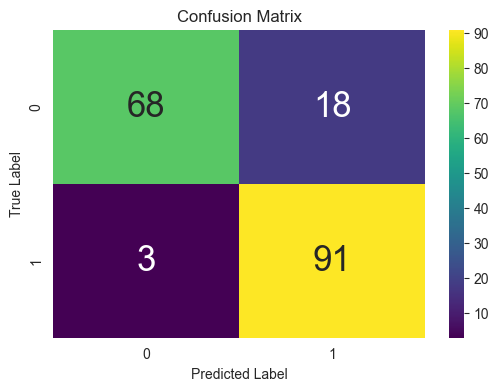

In [390]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cf_rf = confusion_matrix(y_test, y_pred_rf)
annot_kws = {"size": 25}
plt.figure(figsize=(6, 4))
sns.heatmap(cf_rf, annot=True ,cmap = "viridis" ,fmt='g',annot_kws=annot_kws)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [391]:
# Performing Cross validation for Random Forest Classification 
from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score 
cross_val_scores = cross_val_score(rf_class_model, X_train, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=42))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())



Cross-validation accuracy scores: [0.80555556 0.93055556 0.90277778 0.76388889 0.91666667 0.88888889
 0.83333333 0.88888889 0.84722222 0.85915493]
Mean accuracy: 0.8636932707355243


In [392]:
from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') # The average ='weighted' will consider the class imbalance.

# Performing cross-validation with precision scoring
cross_val_scores = cross_val_score(rf_class_model, X_train, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())



Cross-validation precision scores: [0.80899471 0.93072917 0.90432099 0.76604938 0.91808237 0.89249639
 0.85151029 0.88888889 0.84760802 0.86665768]
Mean precision: 0.8675337892891919


In [393]:
# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') # average='macro': The recall score is calculated for each class individually, and then the average of these scores is computed. It gives equal weight to each class, regardless of class imbalance.

recall_scores = cross_val_score(rf_class_model, X_train, y_train, cv=10, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation Recall Scores: [0.83449883 0.85625    0.940625   0.9        0.896875   0.815625
 0.8625     0.79375    0.946875   0.83934295]
Mean Recall Score: 0.8686341783216784


The evaluation results for the Random Forest classifier without and with cross-validation are as follows:

**Without Cross-Validation:**
- **Accuracy Score:** The Random Forest classifier achieved an accuracy of approximately 88.33% on the test data.
- **Precision Score:** The precision score, indicating the ratio of true positive predictions to the total predicted positives, is around 83.49%.
- **Recall Score:** The recall score, representing the true positive rate or sensitivity, is about 96.81%, indicating that the classifier is effective at identifying positive cases.
- **F1 Score:** The F1 score, which considers both precision and recall, is approximately 89.66%. This balanced score indicates a good compromise between precision and recall.
- **Confusion Matrix:** The confusion matrix shows that the classifier made 68 correct predictions for the first class (True Negatives) and 91 correct predictions for the second class (True Positives). It also made 18 false predictions for the first class (False Positives) and 3 false predictions for the second class (False Negatives).

**With Cross-Validation:**
- **Mean Cross-Validation Accuracy:** The Random Forest classifier achieved an average accuracy of around 86.37% across multiple cross-validation folds.
- **Mean Cross-Validation Precision:** The average precision score obtained through cross-validation is approximately 86.75%.
- **Mean Cross-Validation Recall:** The average recall score obtained through cross-validation is about 86.86%. This indicates the classifier's effectiveness in identifying positive cases across different folds.
  
In summary, both evaluations suggest that the Random Forest classifier is performing well in terms of accuracy, precision, recall, and F1 score. The cross-validation results provide a more robust assessment of the model's generalization performance on different subsets of the data.

Based on the comprehensive analysis of performance metrics for all three classification models, it is evident that the Random Forest Classification model demonstrates superior performance. Therefore, the Random Forest model emerges as the optimal choice for predicting heart disease with the highest level of accuracy and effectiveness.

## F.use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy.

In [394]:
from sklearn.decomposition import PCA

pca = PCA(0.90)

X_pca = pca.fit_transform(X_scaled)

X_pca.shape 

(899, 12)

In [395]:
pca.explained_variance_ratio_

array([0.22550291, 0.10019256, 0.09048199, 0.0723219 , 0.0704889 ,
       0.06377371, 0.06102717, 0.05728687, 0.05128931, 0.04567824,
       0.04090691, 0.04041658])

In [396]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=32)

In [397]:
df_pca = pd.DataFrame(data=X_pca)
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.076329,-1.371946,-0.366686,-0.266779,-1.550713,-0.695173,-0.518826,1.088001,0.055632,-0.727057,0.459892,-0.481917
1,1.482291,1.946285,-1.567709,-0.611478,2.722542,0.003551,-0.728085,0.386123,0.032121,-0.005042,-0.083110,-1.224236
2,1.908796,-0.724799,1.450531,1.713999,-1.466029,-1.550059,-1.305906,0.221045,0.948490,-0.803388,-0.918767,0.383529
3,-1.381771,1.813626,-3.166445,0.827996,0.387985,0.058546,0.121701,-0.265566,0.120639,0.567580,0.032775,0.281648
4,1.682918,-1.172728,0.529332,-0.738428,1.265155,0.178781,-1.505979,0.444528,-1.482897,0.780288,-0.627441,-0.035600
...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.569810,-0.705847,-0.188663,-2.002945,0.897904,-0.815891,2.206722,1.971230,2.939533,1.328161,-0.953556,1.114531
895,-1.794885,-0.352264,-0.040003,-0.293328,1.156553,-0.023654,1.612179,1.238346,-0.842758,-0.846254,0.030434,-2.158345
896,-2.424431,-0.812539,-1.468489,-0.182315,-0.028434,-0.310387,-0.023131,-0.151991,-0.152249,0.202531,-0.287003,0.656007
897,2.153347,3.271955,-0.165156,-0.285106,-0.252594,-0.840456,1.070937,-0.353729,0.312126,-2.331793,0.145766,0.646172


### Random Forest Model Building with PCA components

In [398]:
# Fitting the Random Forest regression model with training data
from sklearn.ensemble import RandomForestClassifier
pca_rf_model = RandomForestClassifier(n_estimators=200, max_samples=0.7, oob_score=True, random_state=16)
# Fit the model with the training data
pca_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.7, n_estimators=200, oob_score=True,
                       random_state=16)

In [399]:
#Predicting the heart disease using the model on test data

y_pred_rfc_pca = pca_rf_model.predict(X_test)

In [400]:
# performance metrics  

print("The accuracy score of the Random Forest (PCA) :", accuracy_score(y_test, y_pred_rfc_pca))

print("The recall score of the Random Forest (PCA)  :", recall_score(y_test, y_pred_rfc_pca))

print("The precision score of the Random Forest (PCA)  :", precision_score(y_test, y_pred_rfc_pca))

print("The f1 score of the Random Forest (PCA) :", f1_score(y_test, y_pred_rfc_pca))

print("The confusion matrix of the Random Forest (PCA)  :", confusion_matrix(y_test, y_pred_rfc_pca), sep = '\n')

The accuracy score of the Random Forest (PCA) : 0.8888888888888888
The recall score of the Random Forest (PCA)  : 0.897196261682243
The precision score of the Random Forest (PCA)  : 0.9142857142857143
The f1 score of the Random Forest (PCA) : 0.9056603773584906
The confusion matrix of the Random Forest (PCA)  :
[[64  9]
 [11 96]]


## Performing Cross validation on Random Forest (PCA) Classification model

In [401]:
# Performing Cross validation on Random Forest (PCA) Classification model

from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score on cross validation
cross_val_scores = cross_val_score(pca_rf_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation for accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

Cross-validation for accuracy scores: [0.8125     0.81944444 0.89583333 0.875      0.86013986]
Mean accuracy: 0.8525835275835275


In [402]:
from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') 
# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(pca_rf_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation for precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

Cross-validation for precision scores: [0.81238977 0.82208892 0.90000967 0.87485187 0.86786375]
Mean precision: 0.8554407969141427


In [403]:
# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') 

recall_scores = cross_val_score(pca_rf_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation Recall Scores: [0.88088777 0.81663113 0.8520062  0.82767978 0.87878788]
Mean Recall Score: 0.85119855269109


performance metrics for a Random Forest classifier both before and after applying Principal Component Analysis (PCA) on the data.

Random Forest Before PCA:
Accuracy Score: 0.8889
Recall Score: 0.8972
Precision Score: 0.9143
F1 Score: 0.9057

These metrics indicate the performance of the Random Forest classifier on your dataset before applying PCA. The model achieved good accuracy, precision, recall, and F1 scores. The confusion matrix shows that out of 180 actual instances, 64 were correctly classified as one class, 96 were correctly classified as the other class, 9 were incorrectly classified as the opposite class, and 11 were incorrectly classified.



Random Forest After PCA (Cross-Validation Results):

Mean Accuracy: 0.8526<BR>
Mean Precision: 0.8554<BR>
Mean Recall Score: 0.8512<BR>
These metrics represent the performance of the Random Forest classifier after applying PCA and conducting cross-validation. The mean accuracy, precision, and recall scores are provided based on multiple iterations of cross-validation. This indicates how well the model is performing on average across different subsets of the data.

In summary, before applying PCA, the Random Forest model achieved good performance in terms of accuracy, precision, recall, and F1 score. After applying PCA, the model's performance slightly decreased in terms of accuracy but remained relatively consistent in terms of precision and recall based on cross-validation results.